# Visualise range & prefix filtering results

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import tikzplotlib

matplotlib.rc('axes',edgecolor='black')

In [2]:
def visualise(dir, filename, title):
    
    path = '../results/' + filename + ".txt"
    if dir is not None:
        path = '../results/' + dir + '/' + filename + ".txt"

    df = pd.read_csv(path, sep='\t')

    plt.figure(figsize=(10, 6), dpi=80)
    for col in df.columns[1:]:
        plt.plot(df[df.columns[0]], df[col], '-x', label=col)

    plt.xlabel("Memory usage [bytes]")
    plt.ylabel("FPR")
    plt.title(title)
    plt.legend(frameon=True)
    if dir is not None:
        tikzplotlib.save("tikz/" + filename + "_" + dir + ".tex")
    plt.show()

In [3]:
def new_visualise(dir, filename, title):
    
    path = '../results/' + filename + ".txt"
    if dir is not None:
        path = '../results/' + dir + '/' + filename + ".txt"

    df = pd.read_csv(path, index_col=0)

    plt.figure(figsize=(10, 6), dpi=80)
    for col in df.columns[1:]:
        plt.plot(df[df.columns[0]], df[col], '-x', label=col)

    plt.xlabel("Memory usage [bytes]")
    plt.ylabel("FPR")
    plt.title(title)
    plt.legend(frameon=True)
    if dir is not None:
        tikzplotlib.save("tikz/" + filename + "_" + dir + ".tex")
    plt.show()

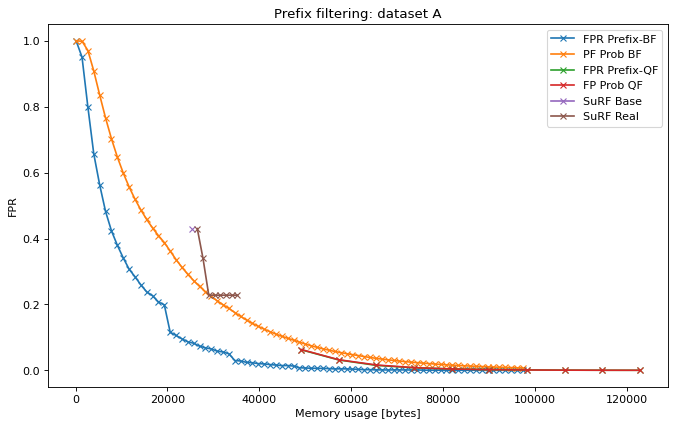

In [4]:
visualise(None, 'prefixBF_datasetA_05', 'Prefix filtering: dataset A')

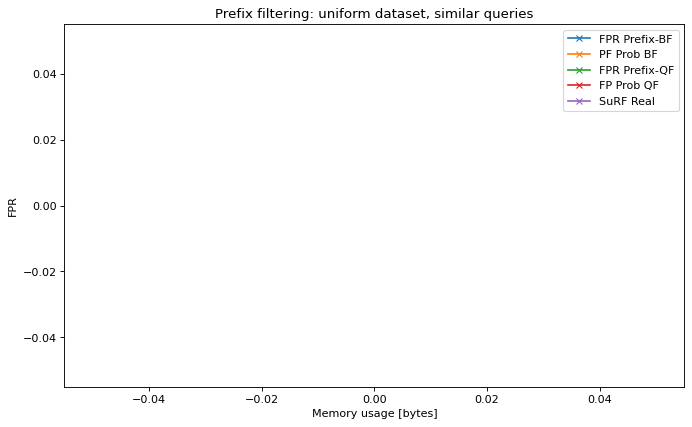

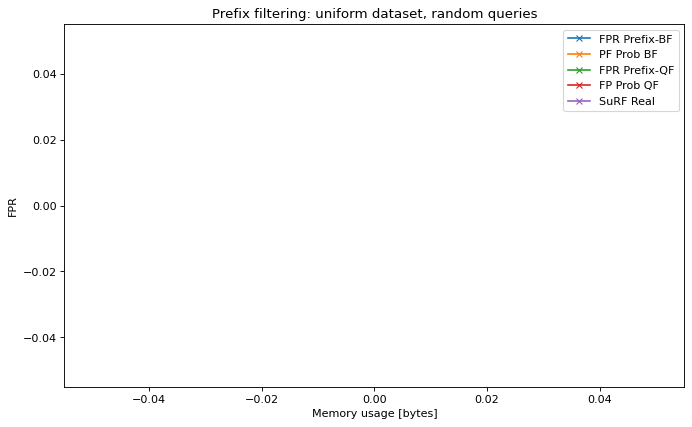

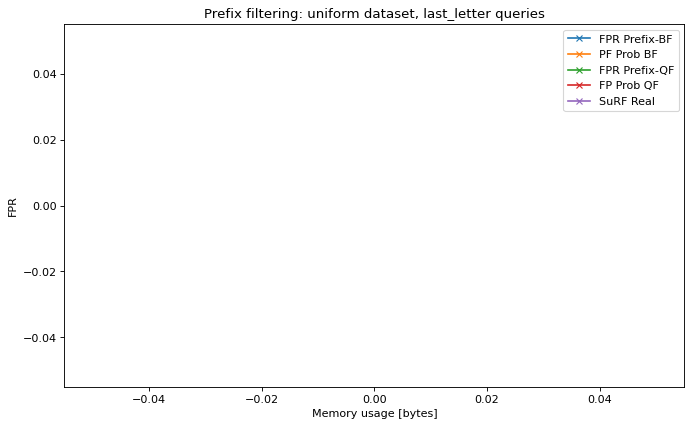

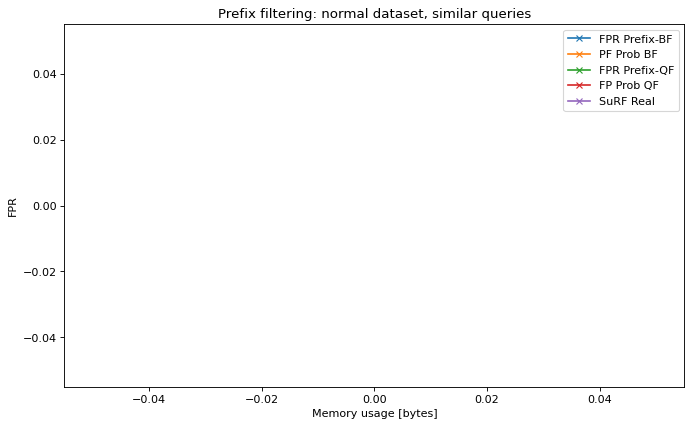

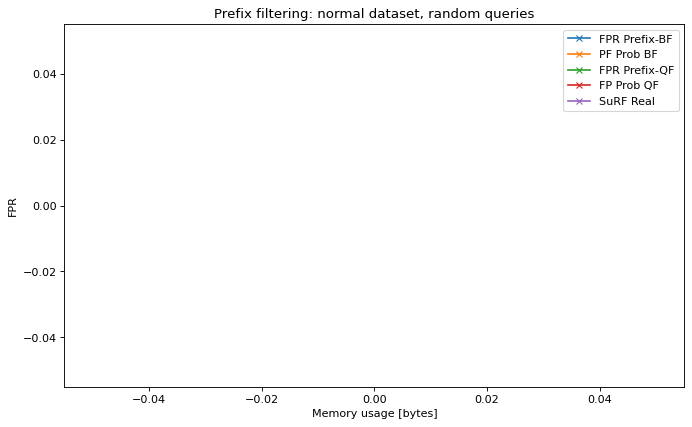

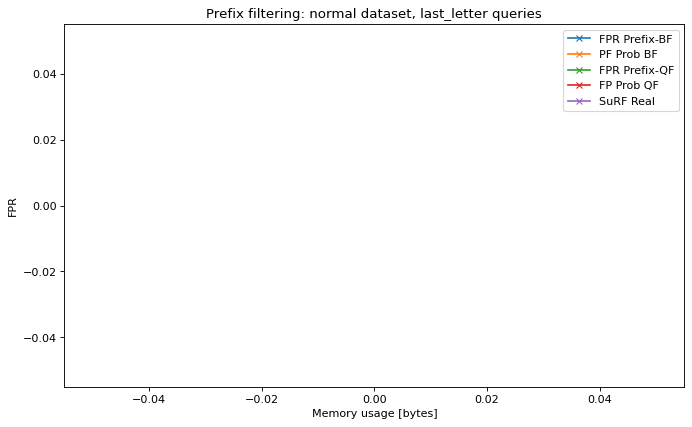

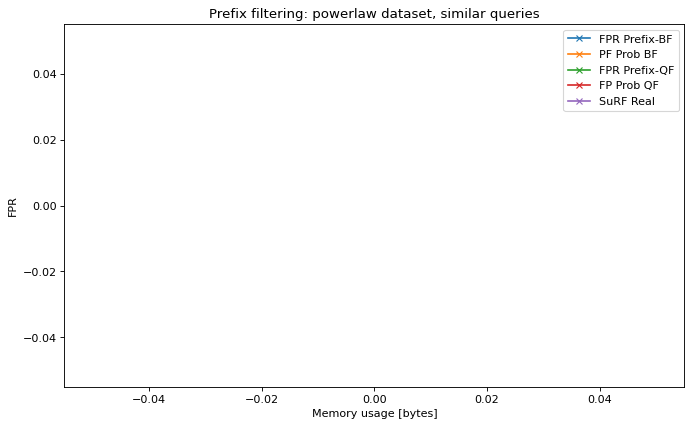

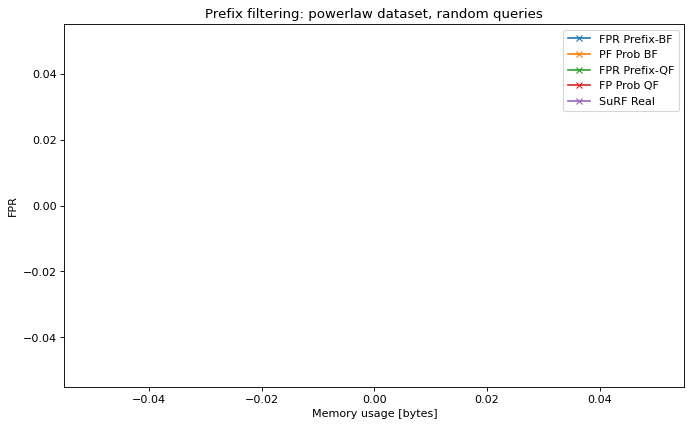

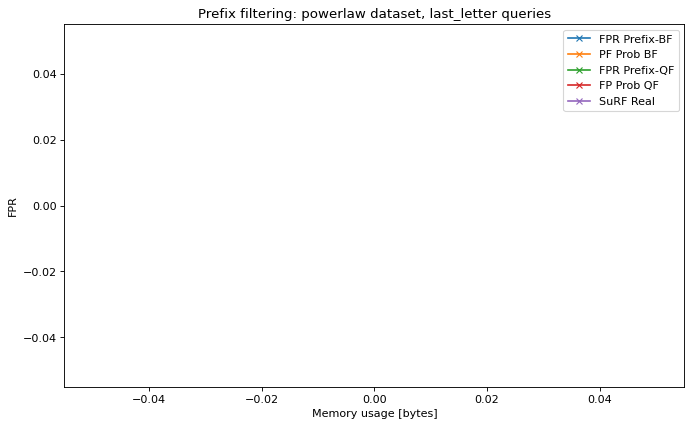

In [5]:
datasets = ["uniform", "normal", "powerlaw"]
queries = ["similar", "random", "last_letter"]
for d in datasets:
    for q in queries:
        visualise('100k', '%s_%s' % (d, q), 'Prefix filtering: %s dataset, %s queries' % (d, q))

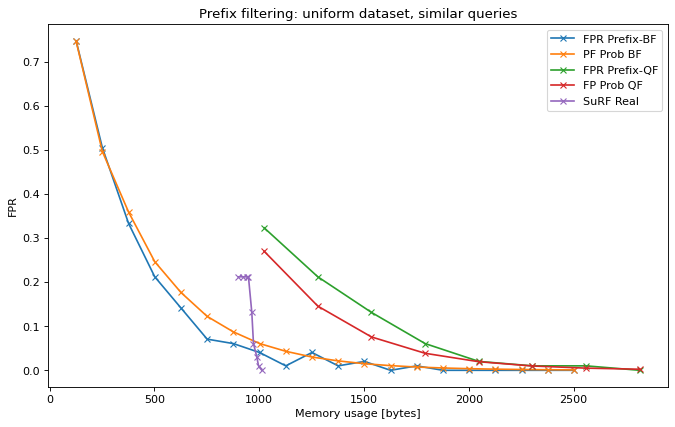

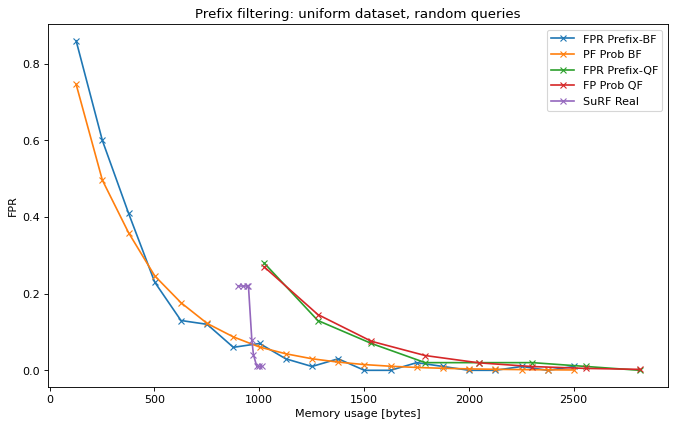

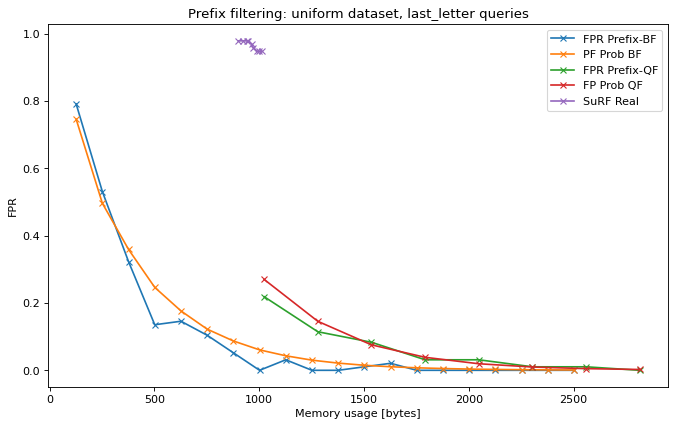

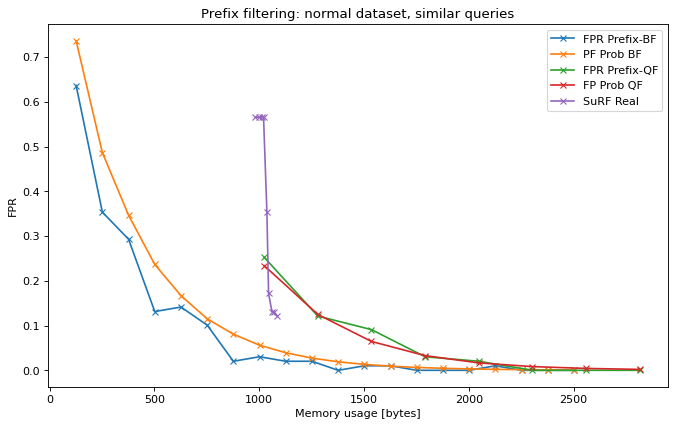

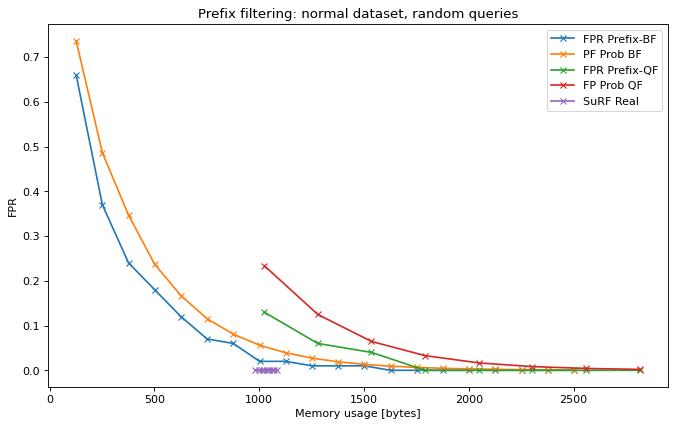

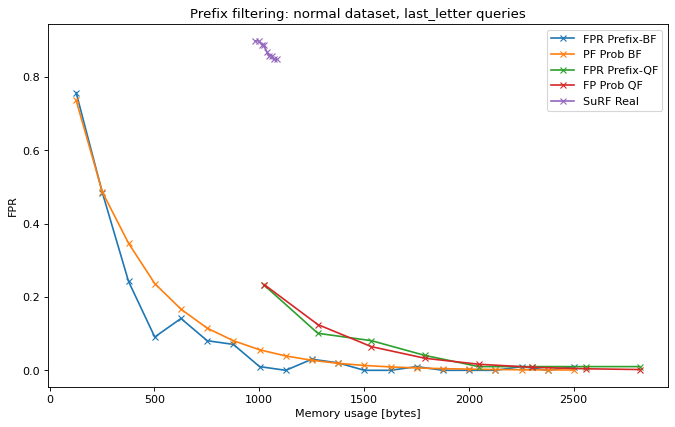

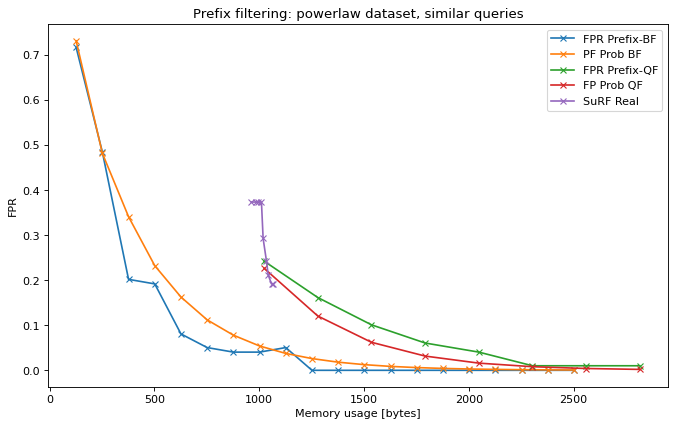

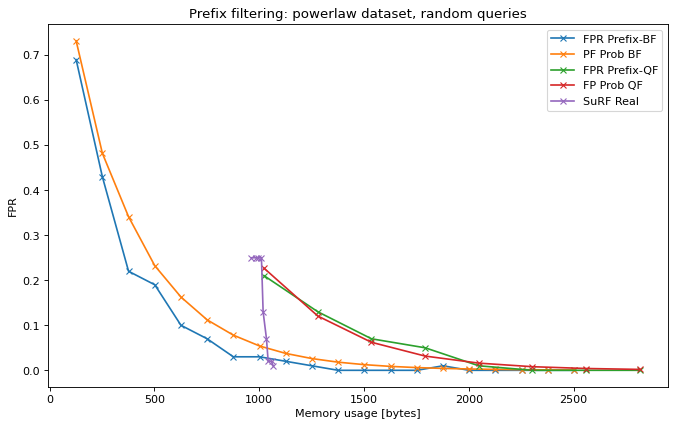

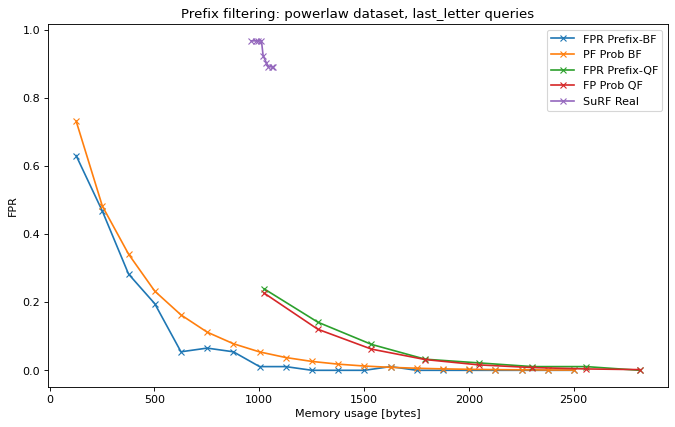

In [6]:
datasets = ["uniform", "normal", "powerlaw"]
queries = ["similar", "random", "last_letter"]
for d in datasets:
    for q in queries:
        visualise('100', '%s_%s' % (d, q), 'Prefix filtering: %s dataset, %s queries' % (d, q))

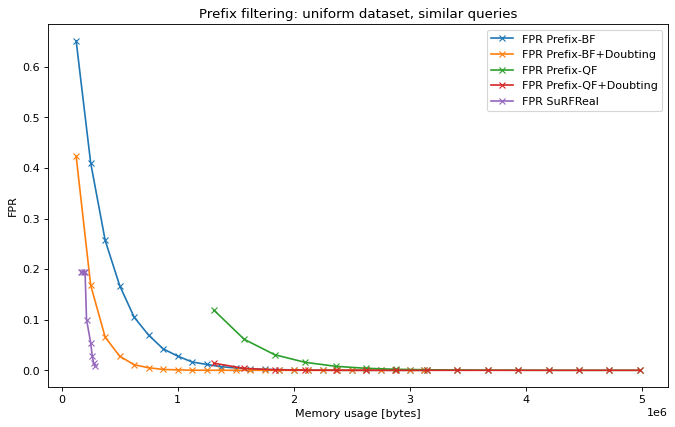

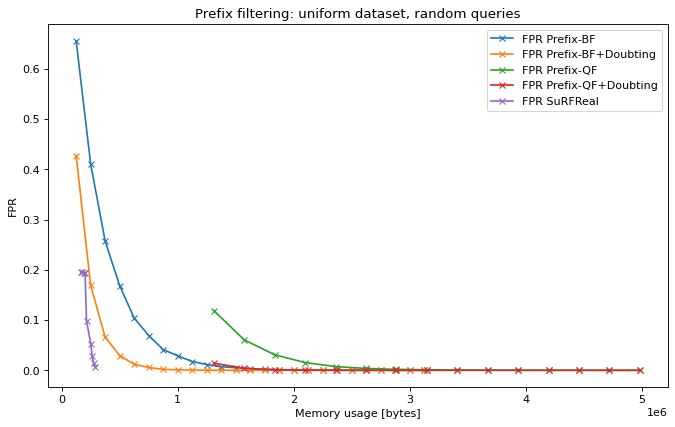

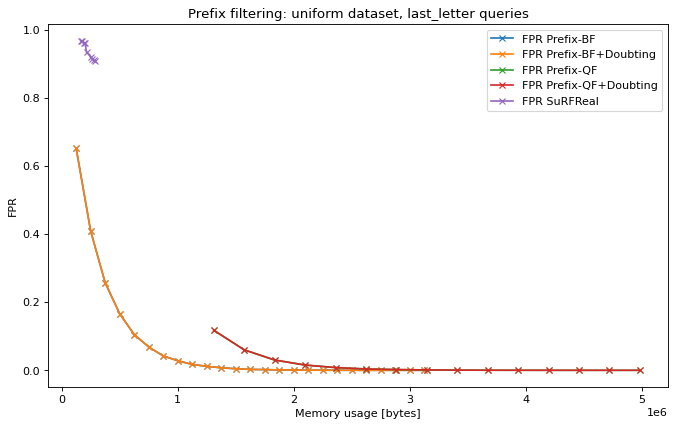

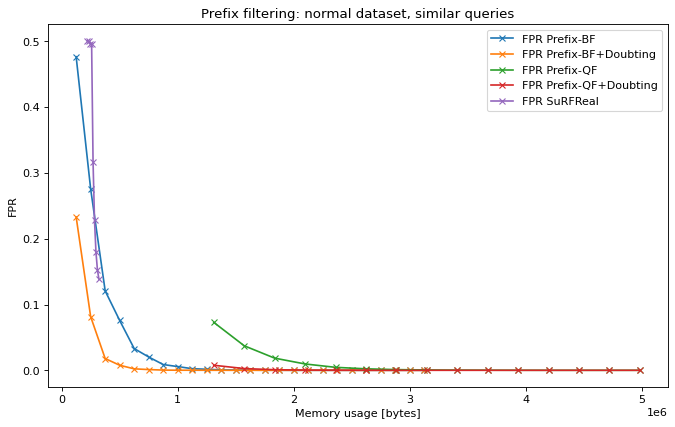

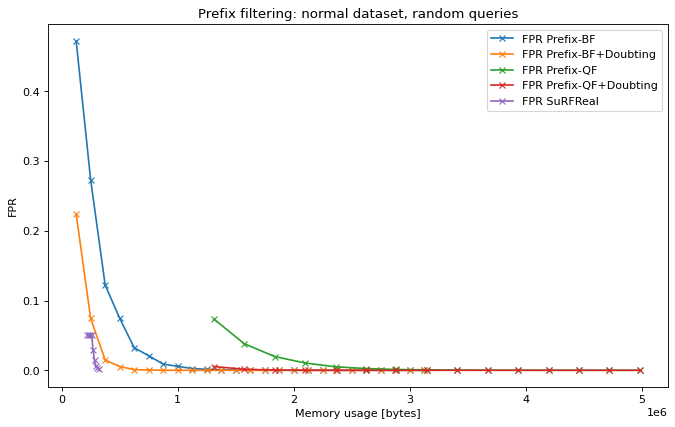

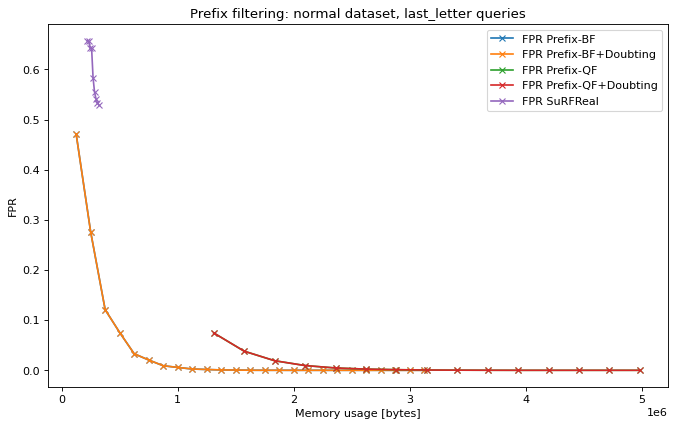

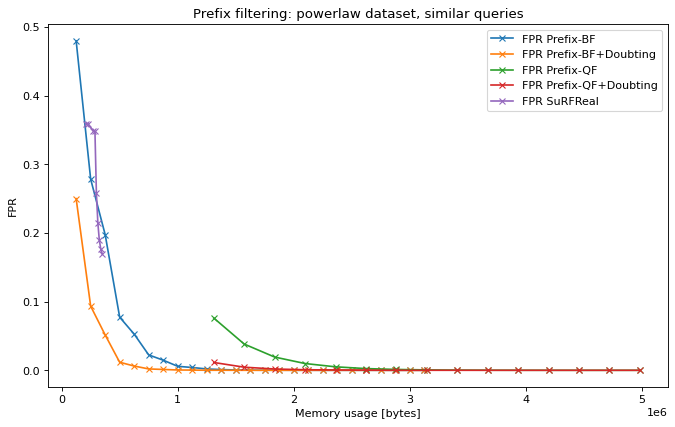

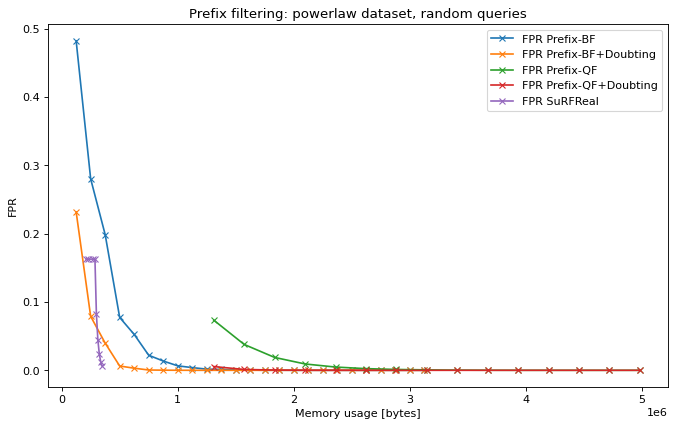

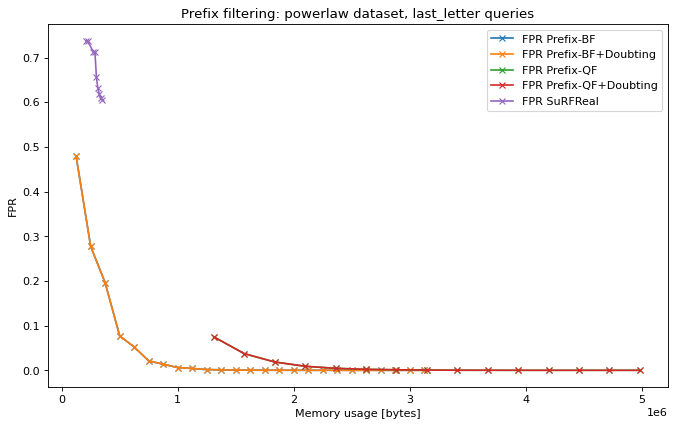

In [7]:
datasets = ["uniform", "normal", "powerlaw"]
queries = ["similar", "random", "last_letter"]
for d in datasets:
    for q in queries:
        new_visualise('100k_test', '%s_%s' % (d, q), 'Prefix filtering: %s dataset, %s queries' % (d, q))

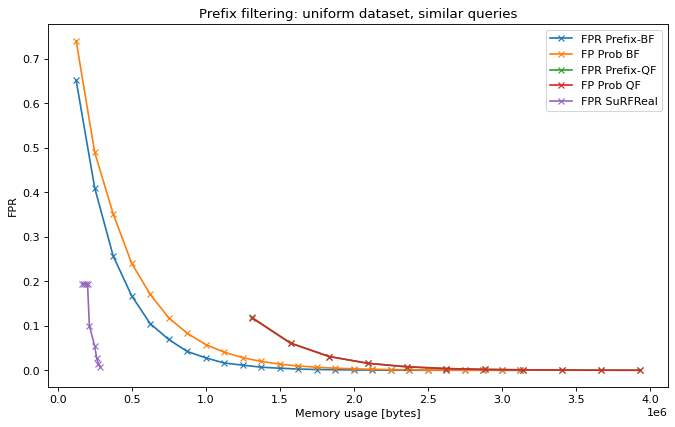

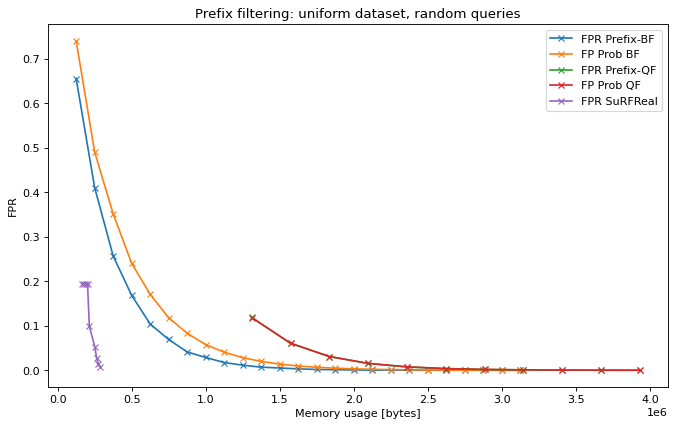

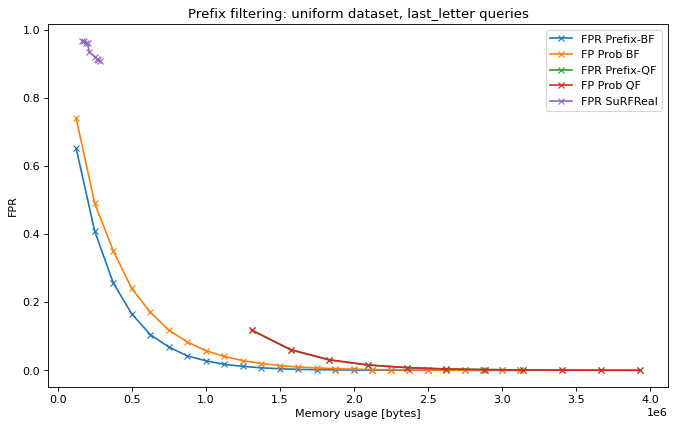

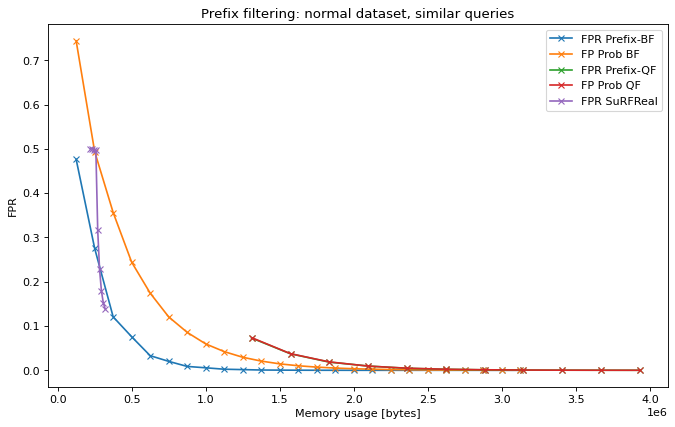

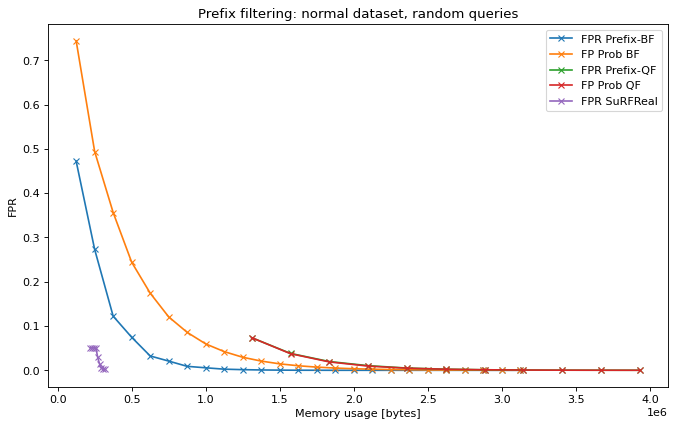

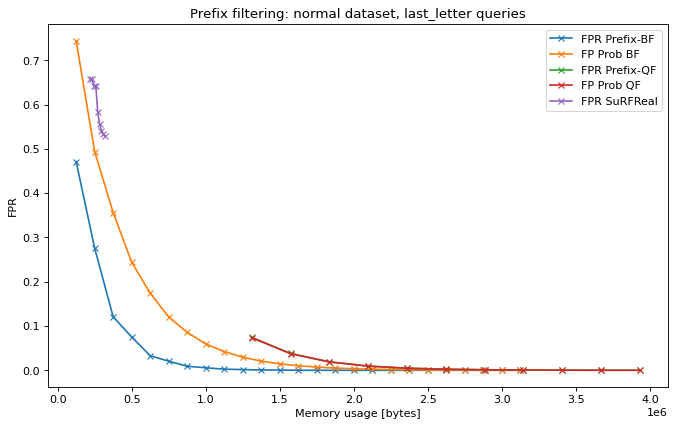

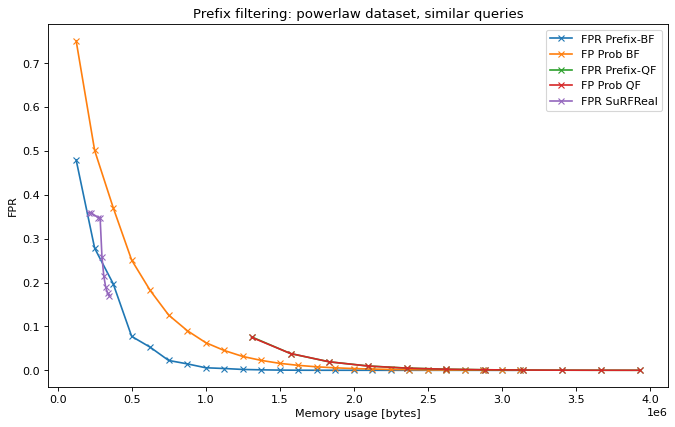

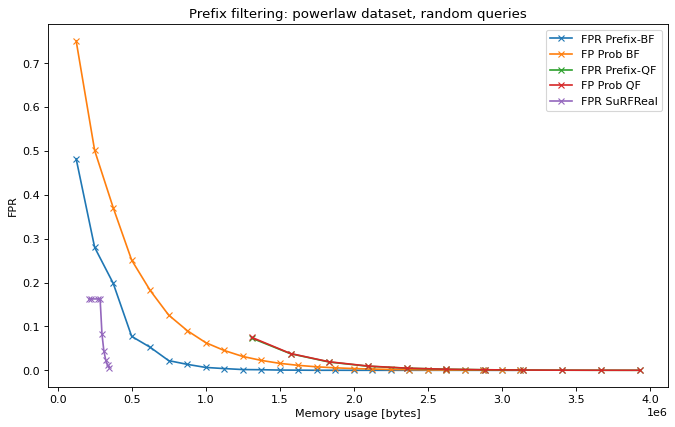

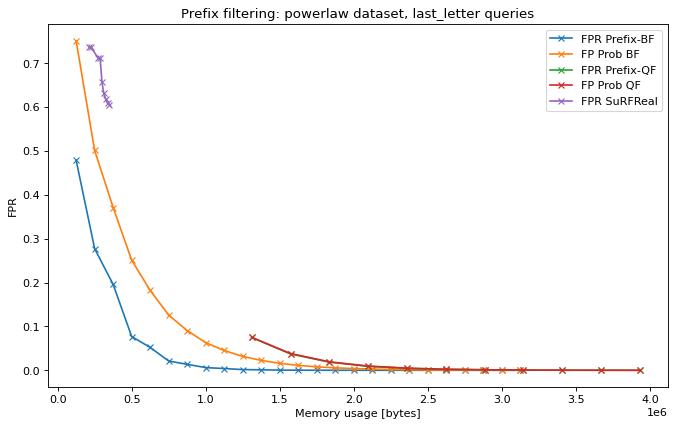

In [8]:
datasets = ["uniform", "normal", "powerlaw"]
queries = ["similar", "random", "last_letter"]
for d in datasets:
    for q in queries:
        new_visualise('100k_auto_q', '%s_%s' % (d, q), 'Prefix filtering: %s dataset, %s queries' % (d, q))

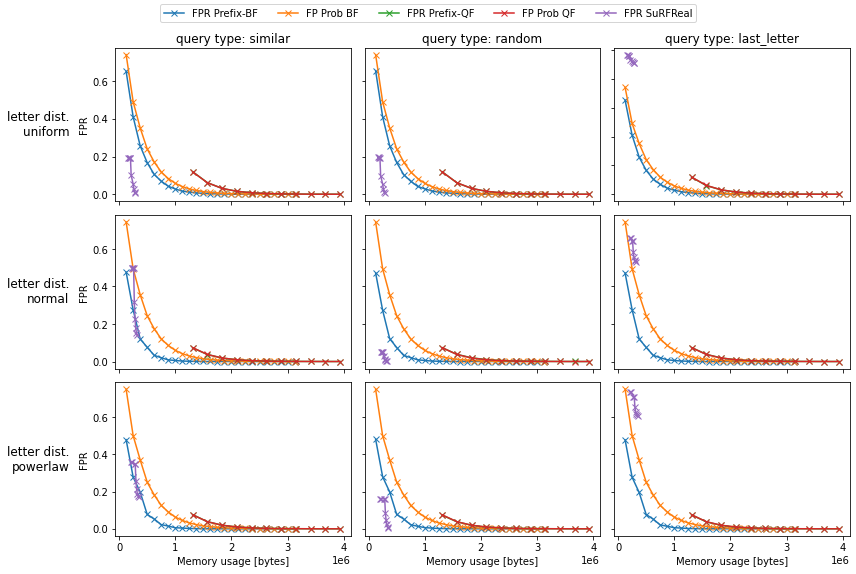

In [9]:
def draw_subplot(dir, filename, ax):
    
    path = '../results/' + filename + ".txt"
    if dir is not None:
        path = '../results/' + dir + '/' + filename + ".txt"

    df = pd.read_csv(path, index_col=0)

    #plt.figure(figsize=(10, 6), dpi=80)
    for col in df.columns[1:]:
        ax.plot(df[df.columns[0]], df[col], '-x', label=col)

    #ax.xlabel("Memory usage [bytes]")
    #ax.ylabel("FPR")
    #plt.legend(frameon=True)
    #if dir is not None:
    #    tikzplotlib.save("tikz/" + filename + "_" + dir + ".tex")
    ax.set(xlabel="Memory usage [bytes]", ylabel="FPR")
    

fig, axs = plt.subplots(3,3, figsize=(12, 8))
#plt.figure(figsize=(10, 6), dpi=80)
#fig.set_figure(figsize=(10, 6), dpi=80)

pad = 5

datasets = ["uniform", "normal", "powerlaw"]
queries = ["similar", "random", "last_letter"]
for row, d in enumerate(datasets):
    for col, q in enumerate(queries):
        ax = axs[row, col]
        draw_subplot('100k_auto_q', '%s_%s' % (d, q), ax)
        if row == 0:
            ax.annotate('query type: ' + q, xy=(0.5, 1), xytext=(0, pad),
                xycoords='axes fraction', textcoords='offset points',
                size='large', ha='center', va='baseline')
        if col == 0:
            ax.annotate('letter dist.\n' + d, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - pad, 0),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size='large', ha='right', va='center')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

fig.tight_layout()
#fig.legend(frameon=True)
#fig.suptitle('Prefix filtering')
#fig.subplots_adjust(left=0.15, top=0.95)

handles, labels = axs[2,2].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=5)
plt.subplots_adjust(top=0.92)

tikzplotlib.save("tikz/" + "prefix_filtering_100k" + ".tex")
plt.show()

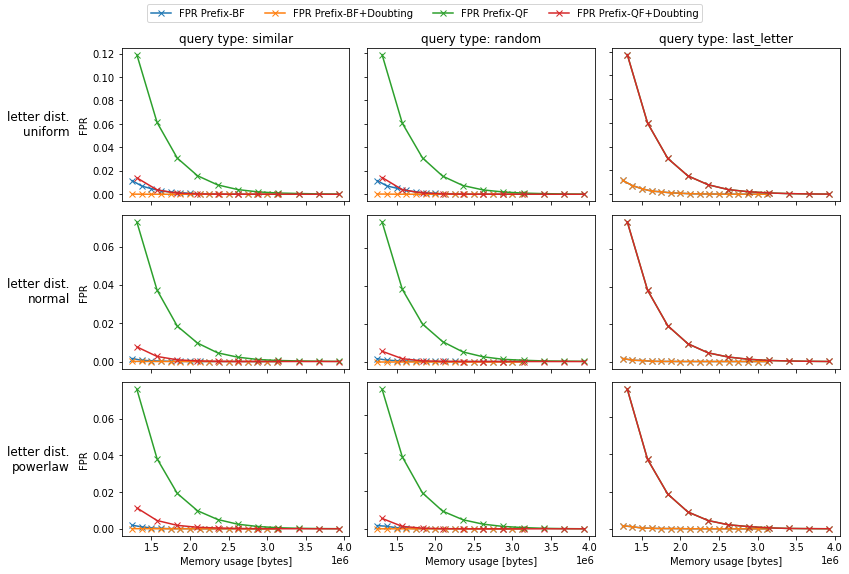

In [10]:
def draw_subplot(dir, filename, ax):
    
    path = '../results/' + filename + ".txt"
    if dir is not None:
        path = '../results/' + dir + '/' + filename + ".txt"

    df = pd.read_csv(path, index_col=0)

    #plt.figure(figsize=(10, 6), dpi=80)
    for col in df.columns[1:]:
        ax.plot(df[df.columns[0]], df[col], '-x', label=col)

    #ax.xlabel("Memory usage [bytes]")
    #ax.ylabel("FPR")
    #plt.legend(frameon=True)
    #if dir is not None:
    #    tikzplotlib.save("tikz/" + filename + "_" + dir + ".tex")
    ax.set(xlabel="Memory usage [bytes]", ylabel="FPR")
    

fig, axs = plt.subplots(3,3, figsize=(12, 8))
#plt.figure(figsize=(10, 6), dpi=80)
#fig.set_figure(figsize=(10, 6), dpi=80)

pad = 5

datasets = ["uniform", "normal", "powerlaw"]
queries = ["similar", "random", "last_letter"]
for row, d in enumerate(datasets):
    for col, q in enumerate(queries):
        ax = axs[row, col]
        draw_subplot('100k_2nd', '%s_%s' % (d, q), ax)
        if row == 0:
            ax.annotate('query type: ' + q, xy=(0.5, 1), xytext=(0, pad),
                xycoords='axes fraction', textcoords='offset points',
                size='large', ha='center', va='baseline')
        if col == 0:
            ax.annotate('letter dist.\n' + d, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - pad, 0),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size='large', ha='right', va='center')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

fig.tight_layout()
#fig.legend(frameon=True)
#fig.suptitle('Prefix filtering')
#fig.subplots_adjust(left=0.15, top=0.95)

handles, labels = axs[2,2].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=5)
plt.subplots_adjust(top=0.92)

#tikzplotlib.save("tikz/" + "prefix_filtering_100k_2nd" + ".tex")
plt.show()

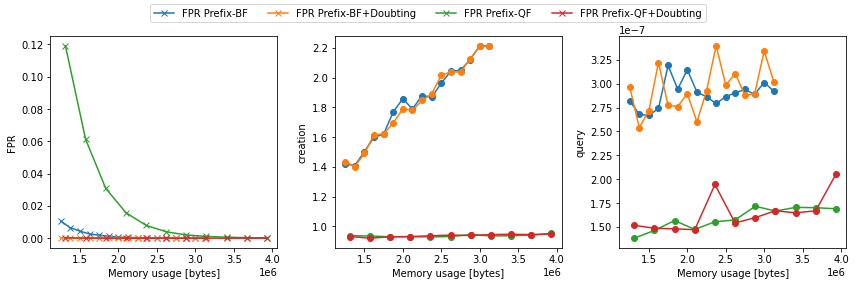

In [18]:
def draw_subplot_time(dir, filename, ax, time_type):
    
    path = '../results/' + filename + "_" + time_type + ".txt"
    if dir is not None:
        path = '../results/' + dir + '/' + filename + "_" + time_type + ".txt"

    df = pd.read_csv(path, index_col=0)

    #plt.figure(figsize=(10, 6), dpi=80)
    for col in df.columns[1:]:
        ax.plot(df[df.columns[0]], df[col], '-o', label=col)

    #ax.xlabel("Memory usage [bytes]")
    #ax.ylabel("FPR")
    #plt.legend(frameon=True)
    #if dir is not None:
    #    tikzplotlib.save("tikz/" + filename + "_" + dir + ".tex")
    ax.set(xlabel="Memory usage [bytes]", ylabel=time_type)
    

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12, 4))
#plt.figure(figsize=(10, 6), dpi=80)
#fig.set_figure(figsize=(10, 6), dpi=80)


draw_subplot('100k_doubting_time', 'uniform_similar', ax1)
draw_subplot_time('100k_doubting_time', 'uniform_similar', ax2, 'creation')
draw_subplot_time('100k_doubting_time', 'uniform_similar', ax3, 'query')


fig.tight_layout()
#fig.legend(frameon=True)
#fig.suptitle('Prefix filtering')
#fig.subplots_adjust(left=0.15, top=0.95)

handles, labels = axs[2,2].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=5)
plt.subplots_adjust(top=0.88)

#tikzplotlib.save("tikz/" + "prefix_filtering_100k_2nd" + ".tex")
plt.show()